In [151]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from preprocessing import load_file_data, filter_eeg_data, epoch_data

# No Focus Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=13702
    Range : 0 ... 13701 =      0.000 ...    54.804 secs
Ready.


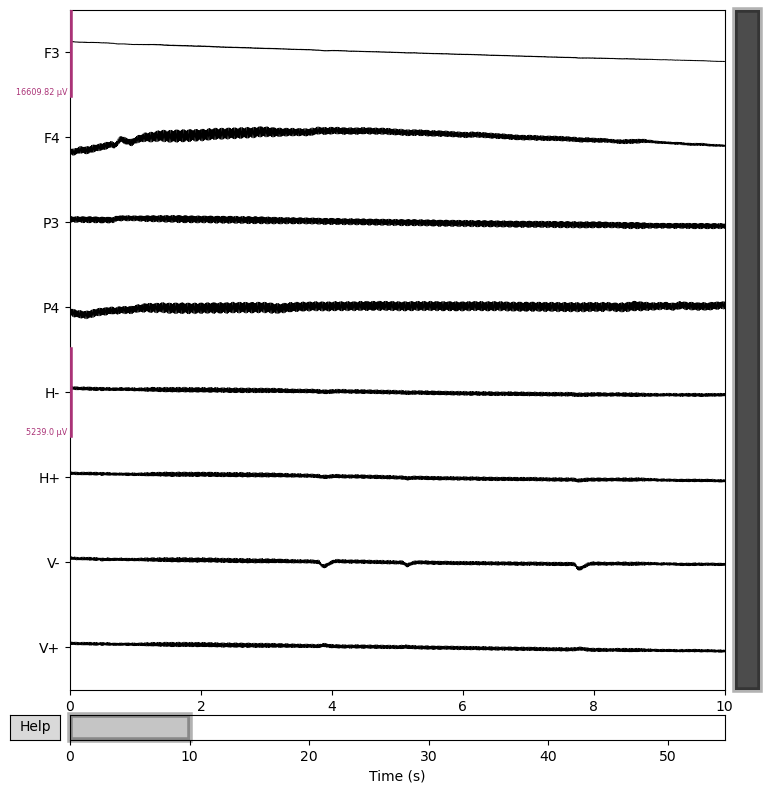

In [152]:
filenames = ["data/OpenBCISession_nofocus_1/BrainFlow*.csv", 
             "data/OpenBCISession_nofocus_2/BrainFlow*.csv", 
             "data/OpenBCISession_nofocus_3/BrainFlow*.csv", 
             "data/OpenBCISession_nofocus_4/BrainFlow*.csv", 
             "data/OpenBCISession_nofocus_5/BrainFlow*.csv"]

raw_focus = load_file_data(filenames)
raw_focus.plot(n_channels=8, scalings='auto');

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


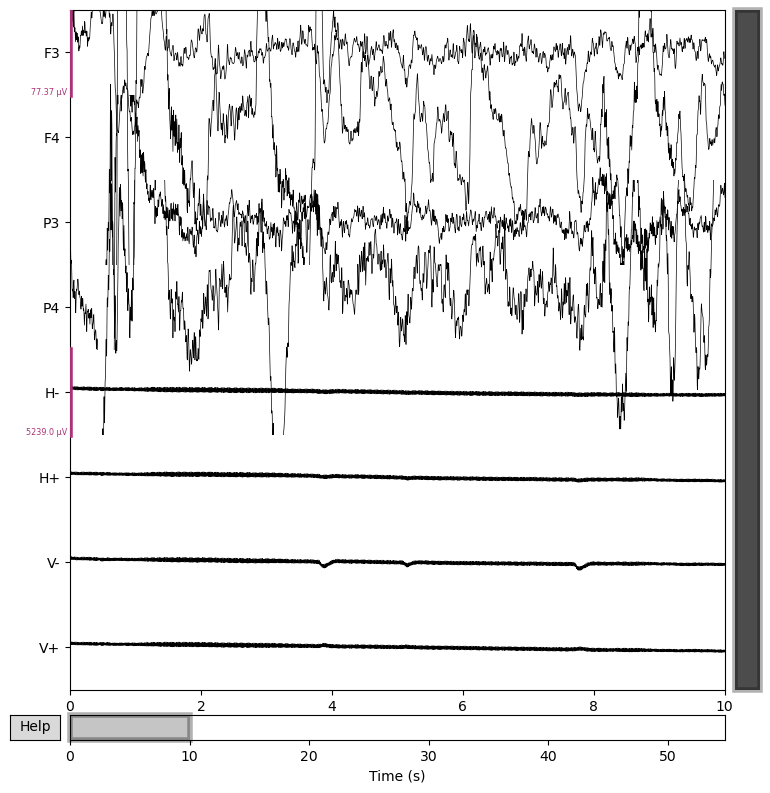

In [153]:
# Apply notch filter to remove 60Hz noise
filtered = filter_eeg_data(raw_focus)
filtered.plot(n_channels=8, scalings='auto');

In [154]:
# Epoch data into 0.5 second windows
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 109 events and 126 original time points ...
0 bad epochs dropped
(109, 8, 126)
(8, 126)


In [155]:
# Make new data frame with 8 channels of data
nofocus_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

# Drop last 4 columns
nofocus_df = nofocus_df.drop(columns=['ch5', 'ch6', 'ch7', 'ch8'])

# Add new columns with label = 0 for no focus
nofocus_df['focus'] = 0

display(nofocus_df)

,ch1,ch2,ch3,ch4,focus
0,-1.680513e-18,3.171291e-18,-1.076748e-17,1.433857e-17,0
1,6.722169e-05,-5.320053e-04,-6.209537e-06,-6.440024e-04,0
2,7.315873e-05,-5.828057e-04,-1.967615e-05,-7.138461e-04,0
3,3.660763e-05,-3.046397e-04,-3.451821e-05,-3.878232e-04,0
4,2.052619e-05,-1.972594e-04,-3.992021e-05,-2.595616e-04,0
...,...,...,...,...,...
121,2.643140e-05,-2.048241e-04,-1.477087e-04,-1.375248e-04,0
122,2.656011e-05,-2.086040e-04,-1.521426e-04,-1.437755e-04,0
123,2.700423e-05,-2.165857e-04,-1.510147e-04,-1.551717e-04,0
124,2.662983e-05,-2.059781e-04,-1.488548e-04,-1.440178e-04,0


# Focus Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=13793
    Range : 0 ... 13792 =      0.000 ...    55.168 secs
Ready.


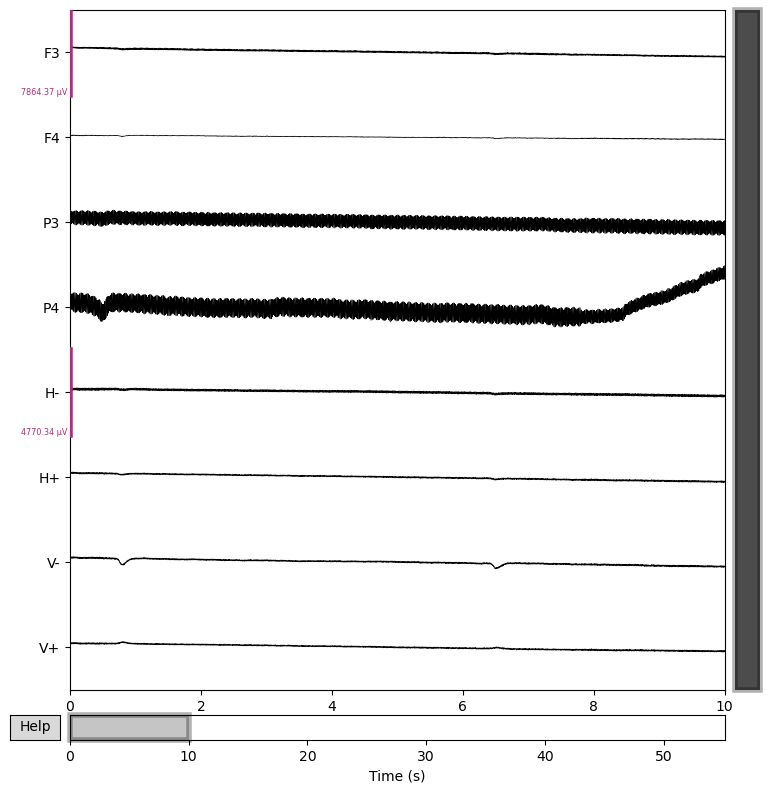

In [156]:
filenames = ["data/OpenBCISession_focus_1/BrainFlow*.csv", 
             "data/OpenBCISession_focus_2/BrainFlow*.csv",
              "data/OpenBCISession_focus_3/BrainFlow*.csv", 
              "data/OpenBCISession_focus_4/BrainFlow*.csv", 
              "data/OpenBCISession_focus_5/BrainFlow*.csv"]

raw_focus = load_file_data(filenames)
raw_focus.plot(n_channels=8, scalings='auto');

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


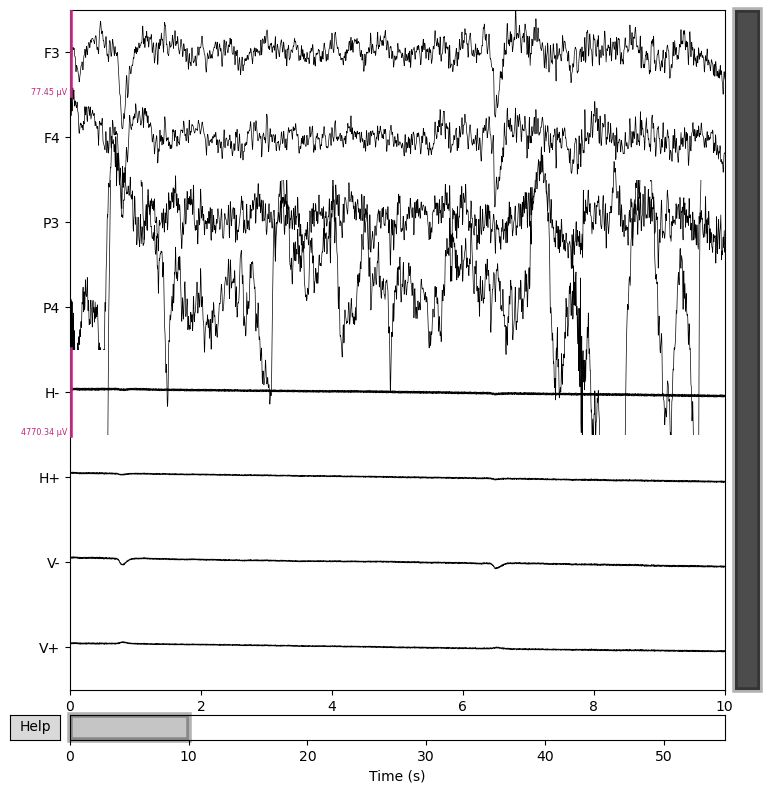

In [157]:
# Apply notch filter to remove 60Hz noise
filtered = filter_eeg_data(raw_focus)
filtered.plot(n_channels=8, scalings='auto');

In [158]:
# Epoch data into 0.5 second windows
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 110 events and 126 original time points ...
0 bad epochs dropped
(110, 8, 126)
(8, 126)


In [159]:
# Make new data frame with 8 channels of data
focus_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

# Drop last 4 columns
focus_df = focus_df.drop(columns=['ch5', 'ch6', 'ch7', 'ch8'])

# Add new column with label = 1 for focus
focus_df['focus'] = 1

display(focus_df)

,ch1,ch2,ch3,ch4,focus
0,-2.070149e-18,1.524151e-17,6.823697e-18,1.070650e-18,1
1,-4.249165e-06,4.396766e-05,-1.839150e-04,-4.661069e-04,1
2,-1.765225e-06,5.101858e-05,-2.076224e-04,-5.093407e-04,1
3,3.379575e-06,3.085057e-05,-1.177157e-04,-2.597080e-04,1
4,2.826113e-06,2.028401e-05,-7.535506e-05,-1.501223e-04,1
...,...,...,...,...,...
121,1.586816e-05,1.257372e-05,-1.440300e-04,-8.140352e-04,1
122,1.643387e-05,1.645322e-05,-1.385370e-04,-8.283922e-04,1
123,1.802940e-05,1.785210e-05,-1.360141e-04,-8.426767e-04,1
124,1.821365e-05,1.253464e-05,-1.343047e-04,-8.395287e-04,1


# Train Validation Test Split

In [160]:
from sklearn.model_selection import train_test_split
from dataset import EEGDataset

train_nofocus, test_nofocus = train_test_split(nofocus_df, test_size=0.2, shuffle=False)
train_nofocus, val_nofocus = train_test_split(train_nofocus, test_size=0.2, shuffle=False)

train_focus, test_focus = train_test_split(focus_df, test_size=0.2, shuffle=False)
train_focus, val_focus = train_test_split(train_focus, test_size=0.2, shuffle=False)

# Concatenate the focus and no focus dataframes
train_df = pd.concat([train_nofocus, train_focus])
val_df = pd.concat([val_nofocus, val_focus])
test_df = pd.concat([test_nofocus, test_focus])

display(train_df.shape)
display(val_df.shape)
display(test_df.shape)
display(train_df)
display(val_df)
display(test_df)

(160, 5)

(40, 5)

(52, 5)

,ch1,ch2,ch3,ch4,focus
0,-1.680513e-18,3.171291e-18,-1.076748e-17,1.433857e-17,0
1,6.722169e-05,-5.320053e-04,-6.209537e-06,-6.440024e-04,0
2,7.315873e-05,-5.828057e-04,-1.967615e-05,-7.138461e-04,0
3,3.660763e-05,-3.046397e-04,-3.451821e-05,-3.878232e-04,0
4,2.052619e-05,-1.972594e-04,-3.992021e-05,-2.595616e-04,0
...,...,...,...,...,...
75,3.296831e-06,2.050336e-05,-9.366202e-05,-1.935098e-04,1
76,3.028524e-06,2.412394e-05,-9.611221e-05,-2.069638e-04,1
77,5.966547e-06,2.826954e-05,-9.739004e-05,-2.243729e-04,1
78,9.411132e-06,2.651464e-05,-8.772888e-05,-2.132457e-04,1


,ch1,ch2,ch3,ch4,focus
80,0.000032,-0.000364,-0.000090,-0.000642,0
81,0.000037,-0.000373,-0.000088,-0.000652,0
82,0.000036,-0.000344,-0.000081,-0.000621,0
83,0.000031,-0.000299,-0.000081,-0.000564,0
84,0.000032,-0.000295,-0.000091,-0.000542,0
85,0.000038,-0.000325,-0.000100,-0.000555,0
86,0.000042,-0.000333,-0.000099,-0.000547,0
87,0.000041,-0.000313,-0.000096,-0.000508,0
88,0.000041,-0.000313,-0.000095,-0.000487,0
89,0.000044,-0.000337,-0.000092,-0.000494,0


,ch1,ch2,ch3,ch4,focus
100,0.000047,-2.411220e-04,-0.000111,-0.000292,0
101,0.000047,-2.520269e-04,-0.000118,-0.000296,0
102,0.000046,-2.649119e-04,-0.000116,-0.000301,0
103,0.000043,-2.456377e-04,-0.000109,-0.000272,0
104,0.000040,-2.177108e-04,-0.000110,-0.000231,0
105,0.000044,-2.250634e-04,-0.000122,-0.000228,0
106,0.000052,-2.545555e-04,-0.000131,-0.000254,0
107,0.000056,-2.566780e-04,-0.000129,-0.000254,0
108,0.000051,-2.283322e-04,-0.000124,-0.000219,0
109,0.000045,-2.133223e-04,-0.000124,-0.000194,0


# Normalization

In [161]:
# Normalize all columns except the last
train_df.iloc[:, :-1] = (train_df.iloc[:, :-1] - train_df.iloc[:, :-1].mean()) / train_df.iloc[:, :-1].std()
val_df.iloc[:, :-1] = (val_df.iloc[:, :-1] - val_df.iloc[:, :-1].mean()) / val_df.iloc[:, :-1].std()
test_df.iloc[:, :-1] = (test_df.iloc[:, :-1] - test_df.iloc[:, :-1].mean()) / test_df.iloc[:, :-1].std()

display(train_df)
display(val_df)
display(test_df)

,ch1,ch2,ch3,ch4,focus
0,-0.398780,0.831297,2.899401,1.761295,0
1,3.398251,-1.527418,2.689978,-0.623645,0
2,3.733606,-1.752648,2.235803,-0.882297,0
3,1.669009,-0.519363,1.735240,0.325066,0
4,0.760646,-0.043278,1.553053,0.800058,0
...,...,...,...,...,...
75,-0.212558,0.922201,-0.259443,1.044668,1
76,-0.227714,0.938254,-0.342078,0.994844,1
77,-0.061759,0.956634,-0.385175,0.930373,1
78,0.132809,0.948853,-0.059342,0.971580,1


,ch1,ch2,ch3,ch4,focus
80,0.400496,-1.283332,0.155675,-2.167524,0
81,0.687842,-1.333620,0.316963,-2.251120,0
82,0.624173,-1.165528,1.124263,-1.984276,0
83,0.351623,-0.900578,1.109154,-1.500509,0
84,0.382730,-0.875440,-0.029097,-1.313444,0
85,0.759461,-1.051160,-0.973771,-1.421496,0
86,1.008371,-1.098687,-0.919922,-1.351117,0
87,0.952744,-0.984359,-0.530026,-1.023911,0
88,0.939162,-0.981729,-0.407363,-0.846763,0
89,1.131939,-1.121530,-0.142734,-0.899770,0


,ch1,ch2,ch3,ch4,focus
100,1.324879,-1.090897,0.683918,0.484448,0
101,1.313898,-1.181142,0.361807,0.468077,0
102,1.291486,-1.287775,0.481826,0.444204,0
103,1.081263,-1.128267,0.805105,0.570060,0
104,0.907955,-0.897153,0.731328,0.743330,0
105,1.150469,-0.958000,0.195651,0.753695,0
106,1.666088,-1.202068,-0.228212,0.644856,0
107,1.884775,-1.219633,-0.170139,0.646428,0
108,1.604063,-0.985052,0.080476,0.794925,0
109,1.224133,-0.860834,0.103227,0.899708,0


# Train and Test Models

Train epoch 1/5 loss: 0.6578


100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


Test loss: 0.0225
Validation accuracy: 59.62%


Train epoch 2/5 loss: 0.6075


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


Test loss: 0.0393
Validation accuracy: 36.54%


Train epoch 3/5 loss: 0.6130


100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


Test loss: 0.0320
Validation accuracy: 40.38%


Train epoch 4/5 loss: 0.5921


100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Test loss: 0.0287
Validation accuracy: 51.92%


Train epoch 5/5 loss: 0.5879


100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


Test loss: 0.0290
Validation accuracy: 50.00%


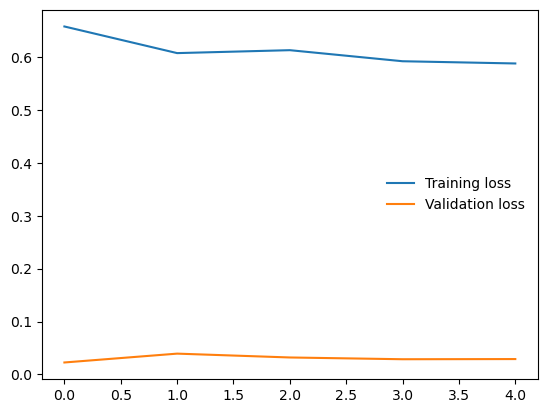

In [162]:
from snn import SNN, SpikingModel, train_model, test_model
from norse.torch import SpikeLatencyLIFEncoder
from norse.torch.module import LIFParameters

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32

model = SpikingModel(
    snn=SNN(num_hidden=100, dt=0.01),
    encoder=SpikeLatencyLIFEncoder(seq_length=batch_size),
    decode_last=False
)

loss_fn = torch.nn.functional.nll_loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=1, verbose=False)

train_dataset = EEGDataset(train_df, -1)
test_dataset = EEGDataset(test_df, -1)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
model, train_losses, val_losses = train_model(model, device, optimizer, scheduler, loss_fn, 5, train_loader, test_loader)

# Plot loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

Training model...


Train epoch 1/5 loss: 0.8564


100%|██████████| 2/2 [00:00<00:00, 1398.57it/s]


Test loss: 0.0240
Validation accuracy: 80.00%


Train epoch 2/5 loss: 0.4582


100%|██████████| 2/2 [00:00<00:00, 118.65it/s]

Test loss: 0.0043


Validation accuracy: 100.00%


Train epoch 3/5 loss: 0.3124


100%|██████████| 2/2 [00:00<00:00, 1843.65it/s]


Test loss: 0.0024
Validation accuracy: 100.00%


Train epoch 4/5 loss: 0.2400


100%|██████████| 2/2 [00:00<00:00, 260.56it/s]


Test loss: 0.0022
Validation accuracy: 97.50%


Train epoch 5/5 loss: 0.1965


100%|██████████| 2/2 [00:00<00:00, 460.84it/s]


Test loss: 0.0023
Validation accuracy: 97.50%

Testing model...



100%|██████████| 2/2 [00:00<00:00, 854.76it/s]


Test loss: 0.0228
Validation accuracy: 75.00%


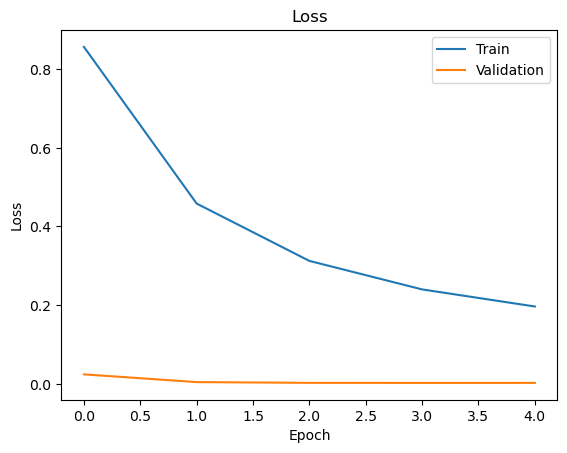

In [163]:
from mlp import MLP, train_model, test_model

train_dataset = EEGDataset(train_df, -1)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)

val_dataset = EEGDataset(val_df, -1)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = EEGDataset(test_df, -1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

model = MLP(num_inputs=4, num_hidden=200, num_outputs=2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=1, verbose=False)
loss_fn = torch.nn.CrossEntropyLoss()

print("Training model...")
model, train_losses, val_losses = train_model(model, device, optimizer, scheduler, loss_fn, 5, train_loader, val_loader)

print("\nTesting model...\n")
test_model(model, device, loss_fn, test_loader)

# Plot loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

# save model
torch.save(model.state_dict(), "eeg_model.pt")
torch.save(model.state_dict(), "eeg_model_new.pt")

In [164]:
import xgboost as xgb

train_data = train_df.iloc[:, :-1].to_numpy()
train_labels = train_df.iloc[:, -1].to_numpy()
test_data = test_df.iloc[:, :-1].to_numpy()
test_labels = test_df.iloc[:, -1].to_numpy()

clf = xgb.XGBClassifier()
clf.fit(train_data, train_labels)

test_predictions = clf.predict(test_data)
print(test_predictions)

# get accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, test_predictions)
print(accuracy)

# clf.save_model('xgb_model.json')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1.0


In [165]:
# make support vector machine
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_data, train_labels)

test_predictions = clf.predict(test_data)
print(test_predictions)

# get accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, test_predictions)
print(accuracy)

# import pickle
# pickle.dump(clf, open("svm_model.pkl", "wb"))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.5769230769230769
